In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score,precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("DataSet_Exam.csv")
dataset.head(10)

,ID,Age,Sex,SoBL,Onset,FMA_pr_total,FMA_po_total,FIM_pr_total,MAL_pr_AOU_mn,MAL_pr_QOM_mn,SIS_pr_rec,SIS_pr_mn(%),SIS_po_rec,Brunn_pr_UE prox,Brunn_pr_UE dis,MAL_AOU_mn ch,MAL_QOM_mn ch,NIHSS_pre_total,FMA_EFFECTIVE_CHANGE
0,991020_01,44.9,0,1,17.0,46,58,107,1.05,1.68,60.0,56.17,60,4.5,4.5,0.06,0.05,4,1
1,991020_02,43.5,0,0,26.0,53,57,120,0.50,0.58,50.0,75.93,50,5.0,5.0,2.46,2.34,2,1
2,991020_03,78.0,0,1,4.0,57,62,101,1.32,1.68,70.0,65.75,80,5.0,5.0,1.21,1.00,1,1
3,991020_04,48.4,0,0,1.0,51,54,120,0.35,0.65,30.0,72.75,70,4.5,5.0,2.08,2.06,1,0
4,991020_05,43.8,0,0,21.0,40,48,109,0.00,0.00,40.0,56.09,50,4.5,4.5,1.24,1.00,2,1
5,991020_06,44.0,0,0,11.0,39,47,117,0.00,0.00,30.0,53.14,50,4.5,4.0,1.37,1.00,2,1
6,991020_07,14.2,0,1,1.0,55,59,105,0.56,1.04,70.0,70.01,90,5.5,5.5,2.58,3.21,1,1
7,991020_08,52.7,1,1,15.0,38,44,106,0.00,0.00,30.0,38.67,60,4.0,4.0,1.05,1.00,2,1
8,991020_09,75.3,1,1,3.0,41,47,78,0.00,0.00,40.0,47.37,60,4.0,5.0,1.35,1.40,6,1
9,991020_10,54.8,1,1,26.0,59,64,123,0.97,1.31,70.0,89.65,60,5.0,5.0,2.41,1.90,3,1


#### Basic dataset analysis

In [3]:
dataset.describe()

,Age,Sex,SoBL,Onset,FMA_pr_total,FMA_po_total,FIM_pr_total,MAL_pr_AOU_mn,MAL_pr_QOM_mn,SIS_pr_rec,SIS_pr_mn(%),SIS_po_rec,Brunn_pr_UE prox,Brunn_pr_UE dis,MAL_AOU_mn ch,MAL_QOM_mn ch,NIHSS_pre_total,FMA_EFFECTIVE_CHANGE
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,292.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,53.773038,0.273038,0.552901,17.536075,40.324232,45.791809,112.324232,0.773447,0.811096,48.675768,63.128669,55.150171,4.030717,3.938567,0.518123,0.554642,3.051195,0.668942
std,11.973220,0.446282,0.498044,18.160704,13.193268,13.023727,13.405963,0.844633,0.897132,18.632228,11.891408,18.246729,0.873357,1.090737,0.662003,0.717885,2.546978,0.471399
min,14.200000,0.000000,0.000000,0.470000,6.000000,9.000000,51.000000,0.000000,0.000000,0.000000,22.620000,0.000000,2.000000,1.000000,-1.560000,-1.640000,0.000000,0.000000
25%,45.800000,0.000000,0.000000,7.000000,31.000000,36.000000,106.000000,0.150000,0.170000,40.000000,56.150000,42.000000,3.500000,3.000000,0.060000,0.070000,1.000000,0.000000
50%,54.400000,0.000000,1.000000,11.000000,41.000000,48.000000,116.000000,0.480000,0.500000,50.000000,63.460000,60.000000,4.000000,4.000000,0.360000,0.370000,2.000000,1.000000
75%,62.000000,1.000000,1.000000,21.000000,51.000000,57.000000,122.000000,1.140000,1.130000,60.000000,70.860000,70.000000,5.000000,5.000000,0.880000,0.910000,5.000000,1.000000
max,86.300000,1.000000,1.000000,171.000000,66.000000,66.000000,126.000000,4.600000,4.410000,90.000000,97.530000,95.000000,6.000000,6.000000,4.260000,3.790000,12.000000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 19 columns):
ID                      293 non-null object
Age                     293 non-null float64
Sex                     293 non-null int64
SoBL                    293 non-null int64
Onset                   293 non-null float64
FMA_pr_total            293 non-null int64
FMA_po_total            293 non-null int64
FIM_pr_total            293 non-null int64
MAL_pr_AOU_mn           293 non-null float64
MAL_pr_QOM_mn           292 non-null float64
SIS_pr_rec              293 non-null float64
SIS_pr_mn(%)            293 non-null float64
SIS_po_rec              293 non-null int64
Brunn_pr_UE prox        293 non-null float64
Brunn_pr_UE dis         293 non-null float64
MAL_AOU_mn ch           293 non-null float64
MAL_QOM_mn ch           293 non-null float64
NIHSS_pre_total         293 non-null int64
FMA_EFFECTIVE_CHANGE    293 non-null int64
dtypes: float64(10), int64(8), object(1)
memory usage: 43

In [5]:
dataset.isnull().sum()

ID                      0
Age                     0
Sex                     0
SoBL                    0
Onset                   0
FMA_pr_total            0
FMA_po_total            0
FIM_pr_total            0
MAL_pr_AOU_mn           0
MAL_pr_QOM_mn           1
SIS_pr_rec              0
SIS_pr_mn(%)            0
SIS_po_rec              0
Brunn_pr_UE prox        0
Brunn_pr_UE dis         0
MAL_AOU_mn ch           0
MAL_QOM_mn ch           0
NIHSS_pre_total         0
FMA_EFFECTIVE_CHANGE    0
dtype: int64

In [6]:
dataset = dataset.fillna(value=dataset.quantile(0.75))
dataset.isnull().sum()

ID                      0
Age                     0
Sex                     0
SoBL                    0
Onset                   0
FMA_pr_total            0
FMA_po_total            0
FIM_pr_total            0
MAL_pr_AOU_mn           0
MAL_pr_QOM_mn           0
SIS_pr_rec              0
SIS_pr_mn(%)            0
SIS_po_rec              0
Brunn_pr_UE prox        0
Brunn_pr_UE dis         0
MAL_AOU_mn ch           0
MAL_QOM_mn ch           0
NIHSS_pre_total         0
FMA_EFFECTIVE_CHANGE    0
dtype: int64

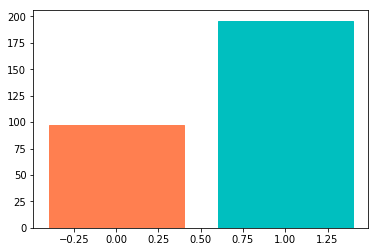

In [7]:
counts = dataset["FMA_EFFECTIVE_CHANGE"].value_counts()
plotlist = plt.bar(counts.index, counts.values)
plotlist[0].set_color('c')
plotlist[1].set_color('coral')
plt.show()

In [8]:
dataset=dataset.drop(columns=['ID'])
dataset.columns

Index(['Age', 'Sex', 'SoBL', 'Onset', 'FMA_pr_total', 'FMA_po_total',
       'FIM_pr_total', 'MAL_pr_AOU_mn', 'MAL_pr_QOM_mn', 'SIS_pr_rec',
       'SIS_pr_mn(%)', 'SIS_po_rec', 'Brunn_pr_UE prox', 'Brunn_pr_UE dis',
       'MAL_AOU_mn ch', 'MAL_QOM_mn ch', 'NIHSS_pre_total',
       'FMA_EFFECTIVE_CHANGE'],
      dtype='object')

### Dataset Visualization

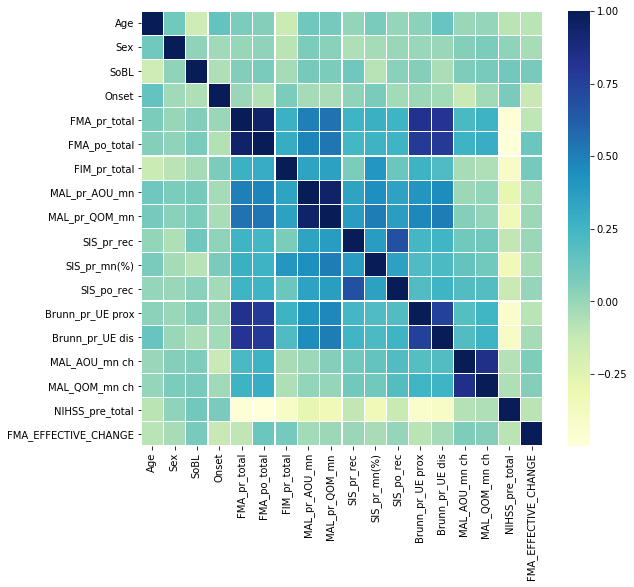

In [9]:
corrmat = dataset.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

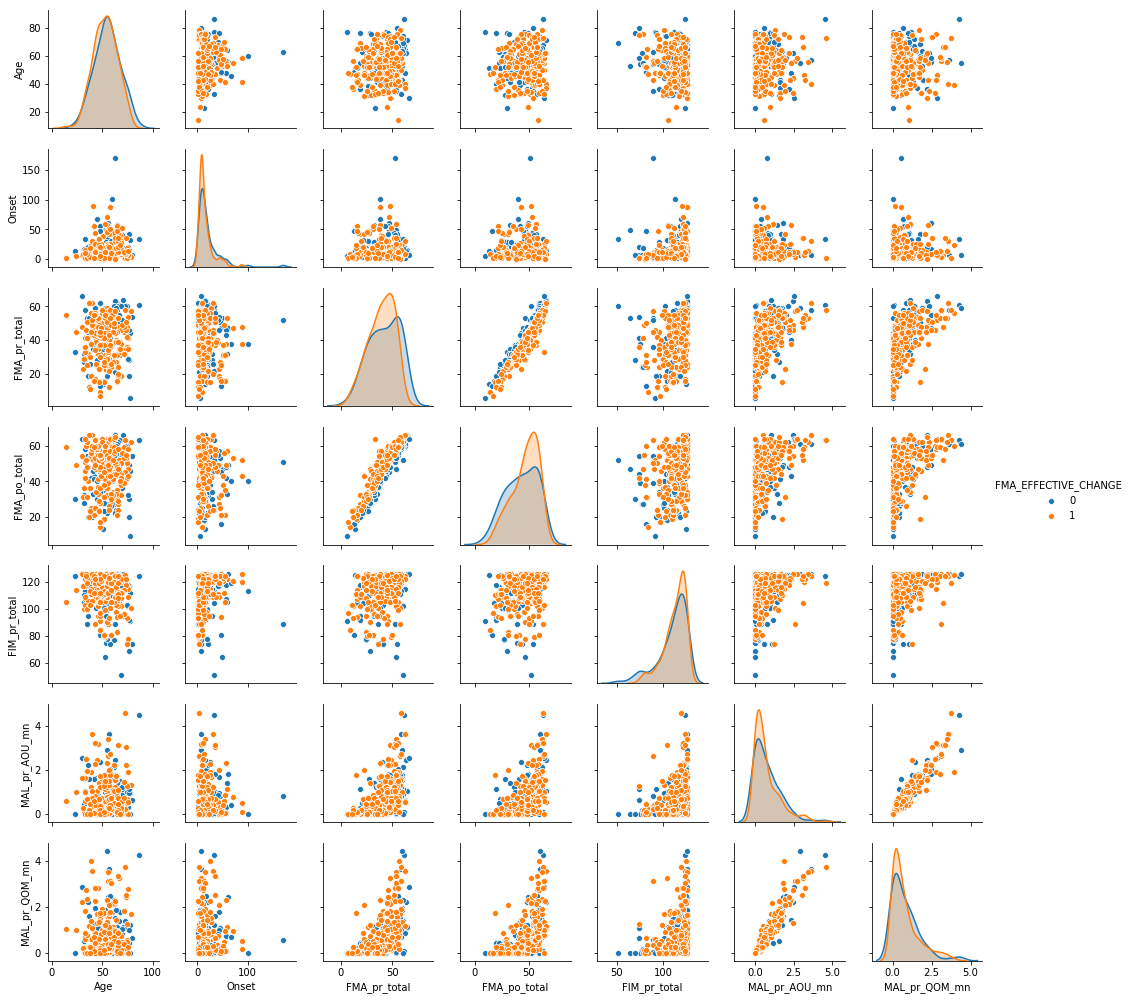

In [10]:
g = sns.pairplot(dataset,hue = "FMA_EFFECTIVE_CHANGE", vars=["Age", "Onset", "FMA_pr_total", "FMA_po_total","FIM_pr_total", "MAL_pr_AOU_mn", "MAL_pr_QOM_mn"],height=2,aspect=1)
plt.show()

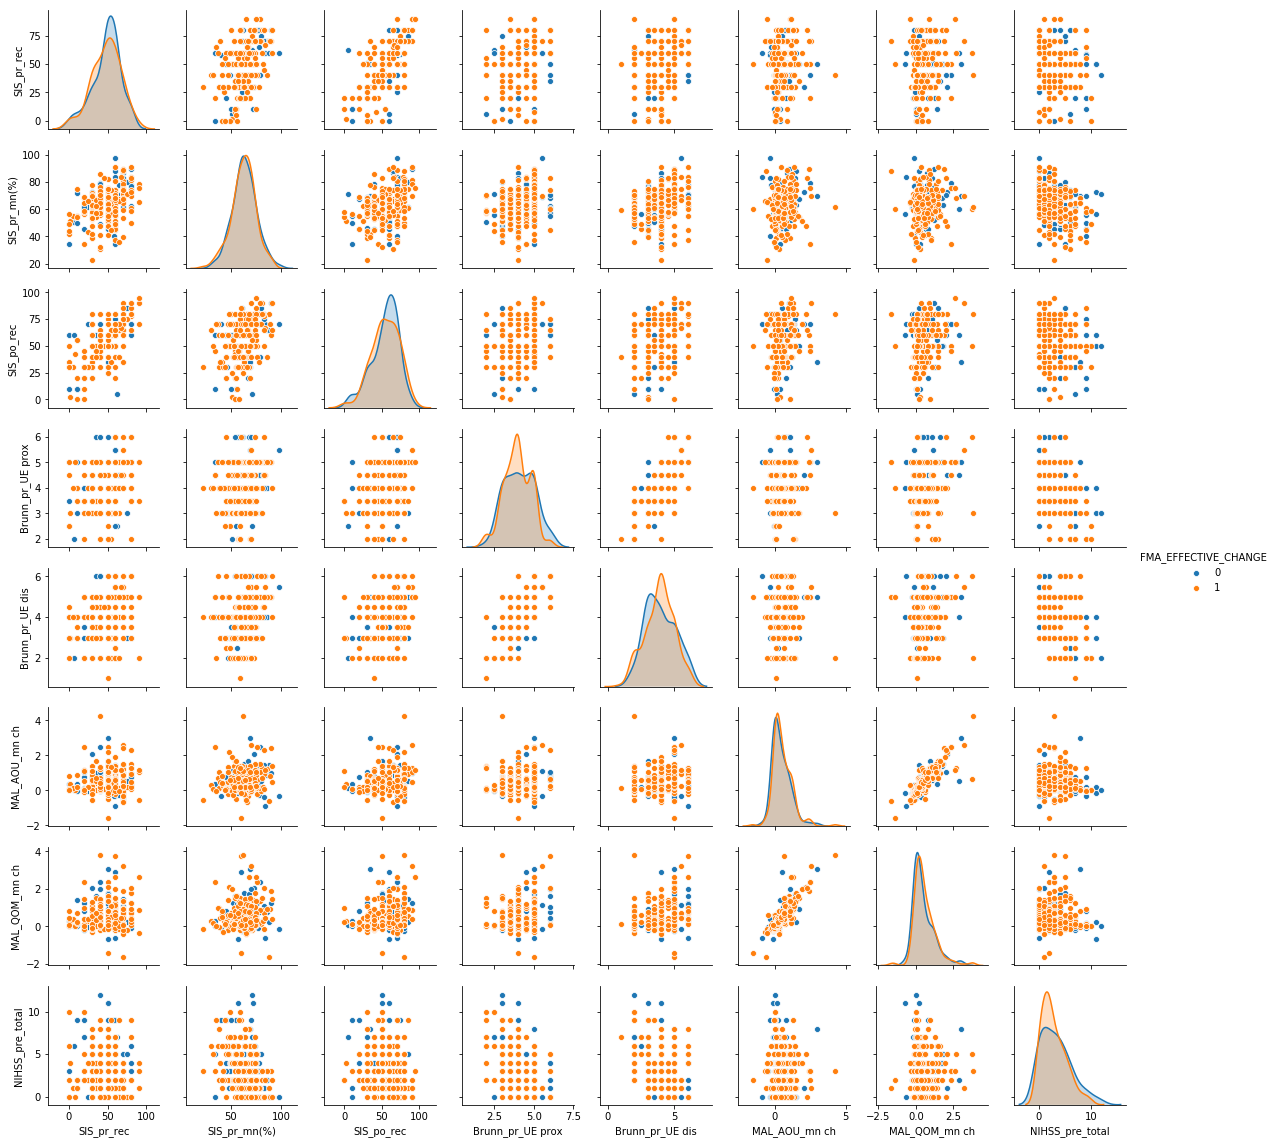

In [11]:
g = sns.pairplot(dataset,hue = "FMA_EFFECTIVE_CHANGE", vars=[ "SIS_pr_rec","SIS_pr_mn(%)", "SIS_po_rec", "Brunn_pr_UE prox", "Brunn_pr_UE dis","MAL_AOU_mn ch", "MAL_QOM_mn ch", "NIHSS_pre_total"],height=2,aspect=1)
plt.show()

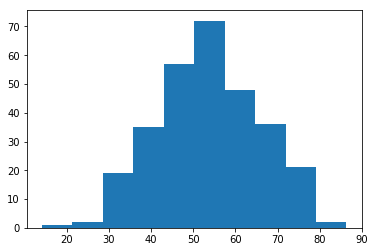

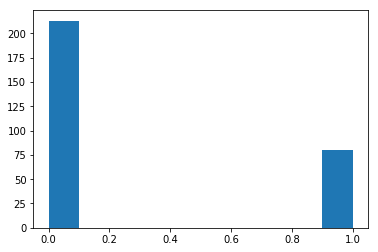

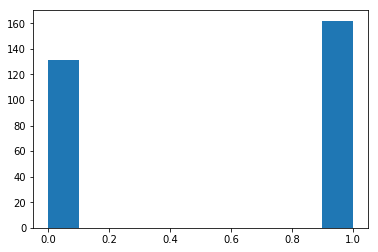

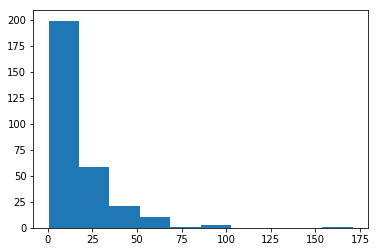

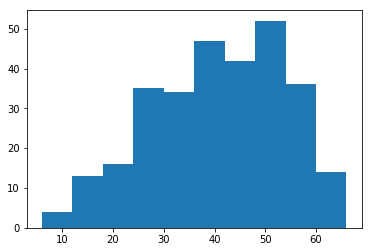

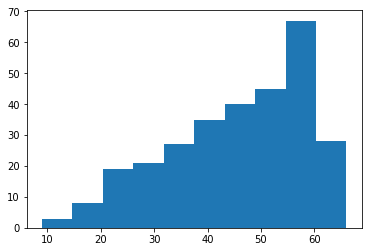

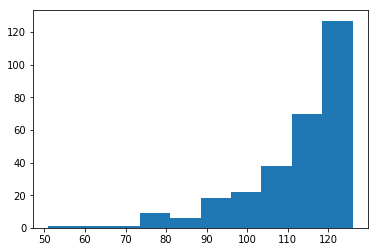

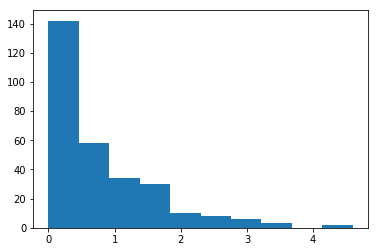

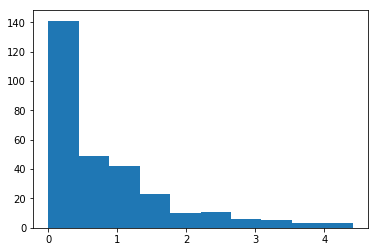

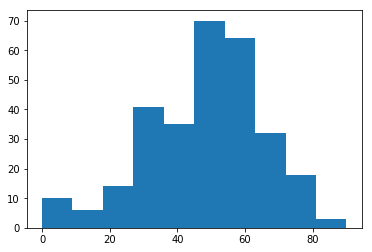

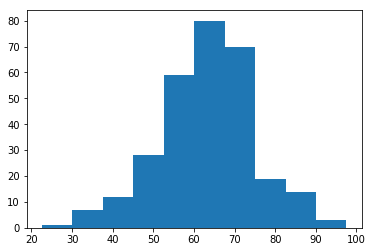

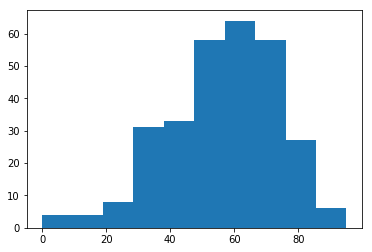

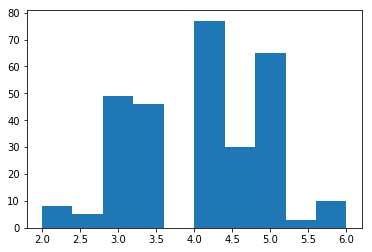

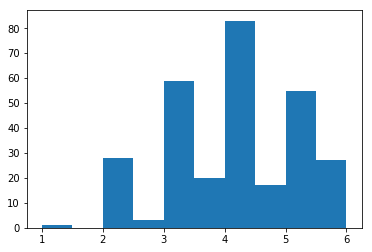

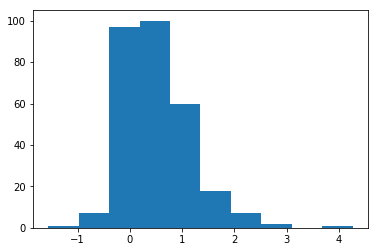

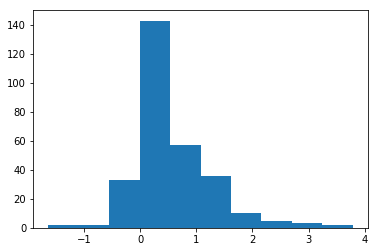

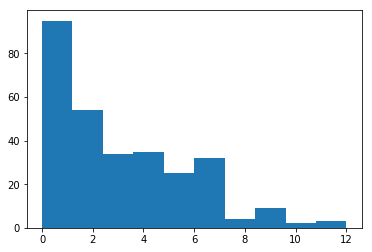

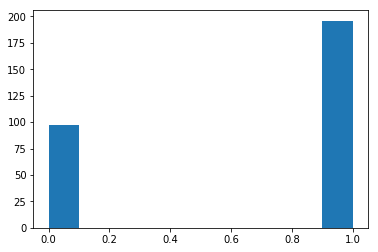

<Figure size 432x288 with 0 Axes>

In [12]:
for i in dataset.columns:
    plt.hist(dataset[i])
    plt.figure()

In [13]:
corrmat.head()

,Age,Sex,SoBL,Onset,FMA_pr_total,FMA_po_total,FIM_pr_total,MAL_pr_AOU_mn,MAL_pr_QOM_mn,SIS_pr_rec,SIS_pr_mn(%),SIS_po_rec,Brunn_pr_UE prox,Brunn_pr_UE dis,MAL_AOU_mn ch,MAL_QOM_mn ch,NIHSS_pre_total,FMA_EFFECTIVE_CHANGE
Age,1.000000,0.107773,-0.153471,0.144571,0.072839,0.049587,-0.141636,0.110977,0.095459,0.017134,0.081186,0.011343,0.029555,0.138607,-0.000163,0.006874,-0.089649,-0.084834
Sex,0.107773,1.000000,0.027240,-0.019123,0.002362,0.023955,-0.092696,0.073629,0.036453,-0.053978,-0.030790,-0.004211,-0.004018,-0.000600,0.047528,0.075667,0.023815,-0.040947
SoBL,-0.153471,0.027240,1.000000,-0.054070,0.055493,0.081164,-0.034122,0.088018,0.071282,0.111093,-0.081033,0.037938,0.051365,-0.047583,0.065896,0.083984,0.104498,0.082144
Onset,0.144571,-0.019123,-0.054070,1.000000,-0.004645,-0.064935,0.073386,-0.030810,-0.042037,0.028080,0.077444,-0.028138,-0.006859,-0.024681,-0.133200,-0.019880,0.079990,-0.126131
FMA_pr_total,0.072839,0.002362,0.055493,-0.004645,1.000000,0.942912,0.274877,0.497226,0.554382,0.258776,0.286378,0.259349,0.833717,0.808268,0.223606,0.266412,-0.471446,-0.101622


In [14]:
dataset.head()

,Age,Sex,SoBL,Onset,FMA_pr_total,FMA_po_total,FIM_pr_total,MAL_pr_AOU_mn,MAL_pr_QOM_mn,SIS_pr_rec,SIS_pr_mn(%),SIS_po_rec,Brunn_pr_UE prox,Brunn_pr_UE dis,MAL_AOU_mn ch,MAL_QOM_mn ch,NIHSS_pre_total,FMA_EFFECTIVE_CHANGE
0,44.9,0,1,17.0,46,58,107,1.05,1.68,60.0,56.17,60,4.5,4.5,0.06,0.05,4,1
1,43.5,0,0,26.0,53,57,120,0.50,0.58,50.0,75.93,50,5.0,5.0,2.46,2.34,2,1
2,78.0,0,1,4.0,57,62,101,1.32,1.68,70.0,65.75,80,5.0,5.0,1.21,1.00,1,1
3,48.4,0,0,1.0,51,54,120,0.35,0.65,30.0,72.75,70,4.5,5.0,2.08,2.06,1,0
4,43.8,0,0,21.0,40,48,109,0.00,0.00,40.0,56.09,50,4.5,4.5,1.24,1.00,2,1


In [15]:
#X = dataset.drop("FMA_EFFECTIVE_CHANGE",1)
y = dataset['FMA_EFFECTIVE_CHANGE']

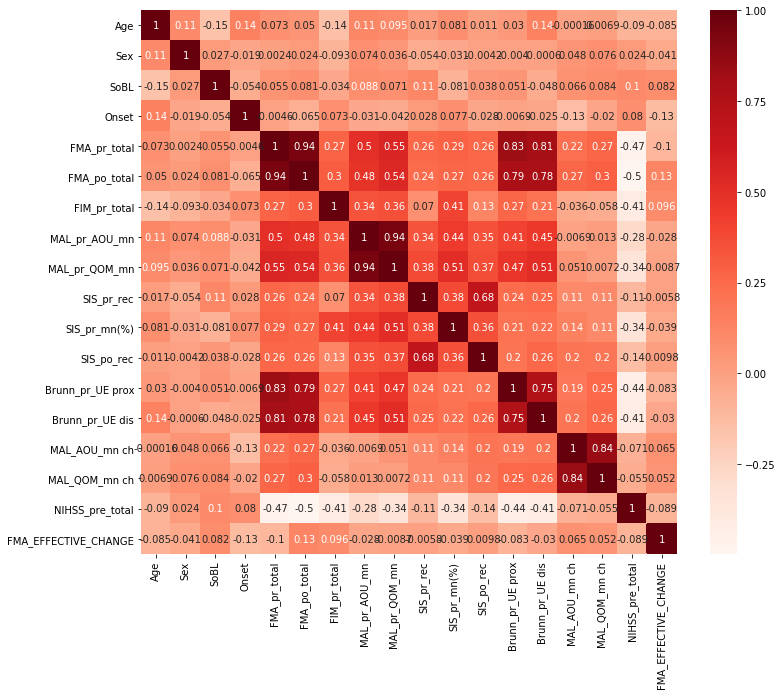

In [16]:
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
cor_target = abs(cor["FMA_EFFECTIVE_CHANGE"])

In [18]:
relevant_features = cor_target[cor_target>0.1]
relevant_features

Onset                   0.126131
FMA_pr_total            0.101622
FMA_po_total            0.126516
FMA_EFFECTIVE_CHANGE    1.000000
Name: FMA_EFFECTIVE_CHANGE, dtype: float64

In [19]:
new_dataset = dataset[['Onset','FMA_pr_total','FMA_po_total']]
#new_dataset = dataset[['Age', 'FMA_pr_total', 'FMA_po_total', 'FIM_pr_total', 'MAL_pr_AOU_mn', 'MAL_AOU_mn ch', 'NIHSS_pre_total']]

In [20]:
new_dataset.head()

,Onset,FMA_pr_total,FMA_po_total
0,17.0,46,58
1,26.0,53,57
2,4.0,57,62
3,1.0,51,54
4,21.0,40,48


In [21]:
X = new_dataset.values[:,0:]
y = dataset['FMA_EFFECTIVE_CHANGE']

smote = SMOTE(random_state = 2)
X,Y= smote.fit_resample(X,y)

## Trying different models

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [23]:
model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'Support Vector Machine', 'AdaBoostClassifier', 'XGBoost', 'LightGBM', 'CatBoost']
result_test_accuracy = []
result_test_precision_macro = []
result_test_recall_macro = []
result_test_f1_weighted = []
result_test_roc_auc = []

In [24]:
def calculate_results(model):
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=50)
    
    sorted(scores.keys())
    result_test_accuracy.append(scores['test_accuracy'].mean())
    result_test_precision_macro.append(scores['test_precision_macro'].mean())
    result_test_recall_macro.append(scores['test_recall_macro'].mean())
    result_test_f1_weighted.append(scores['test_f1_weighted'].mean())
    result_test_roc_auc.append(scores['test_roc_auc'].mean())

#### Logistic Regression

In [25]:
LR = LogisticRegression(C=100, solver='liblinear',max_iter=1000) 
calculate_results(LR)

In [26]:
decision_tree = DecisionTreeClassifier()
calculate_results(decision_tree)

In [27]:
random_forest = RandomForestClassifier(n_estimators=100)
calculate_results(random_forest)

In [28]:
KNN = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
calculate_results(KNN)

In [29]:
bayes = GaussianNB()
calculate_results(bayes)

In [30]:
SVM = SVC(probability = True,gamma='auto')
calculate_results(SVM)

In [31]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
calculate_results(adaboost)

In [32]:
xgb = XGBClassifier()
calculate_results(xgb)

In [33]:
lgbm = LGBMClassifier(n_estimators=400)
calculate_results(lgbm)

In [34]:
catBoost = CatBoostClassifier(iterations=100, verbose=False)
calculate_results(catBoost)

In [35]:
models_initial = pd.DataFrame({
    'Model'       : model_name,
    'Accuracy'    : result_test_accuracy,
    'Precision'   : result_test_precision_macro,
    'Recall'      : result_test_recall_macro,
    'F1_score'    : result_test_f1_weighted,
    'AUC_ROC'     : result_test_roc_auc,
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,0.921548,0.934333,0.921667,0.920143,0.921667
6,AdaBoostClassifier,0.906905,0.923000,0.907500,0.904111,0.950417
8,LightGBM,0.903929,0.924500,0.903333,0.901024,0.955278
7,XGBoost,0.896429,0.911167,0.896667,0.894278,0.953611
9,CatBoost,0.889405,0.904833,0.889167,0.886984,0.942083
2,Random Forest,0.876548,0.893500,0.876667,0.874095,0.951389
5,Support Vector Machine,0.859762,0.883667,0.862500,0.845317,0.955417
3,K-Nearest Neighbors,0.768214,0.795500,0.765833,0.751286,0.879375
4,Naive Bayes,0.585833,0.579333,0.588333,0.541706,0.710972


In [36]:
LR = LogisticRegression(C=100, solver='liblinear',max_iter=1000)
result = LR.fit(X_train, y_train)

In [37]:
y_pred = result.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [39]:
accuracy_score(y_test, y_pred)

1.0

In [40]:
confusion_matrix(y_test, y_pred)

array([[36,  0],
       [ 0, 43]], dtype=int64)

In [41]:
precision_score(y_test, y_pred, average='macro')  

1.0